# 项目：调查TMDb电影的数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本次报告选择了TMDb电影数据集，该数据集中包含了“制作成本、票房收入、受欢迎程度、导演、制作公司、上映日期、电影时长、电影风格、评分”等信息。我选取了电影风格（genres）、受欢迎程度（popularity）、上映日期（release_date）、票房收入（revenue）、制作成本（budget）、平均评分（vote_average）等因素对影片收入的影响。

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# 调用魔法方法 使得每次显示结果时不用调用plt.show()方法
sns.set(style='white', color_codes=True)

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
# 与 notebook 保持一致。关于更多信息，请访问该网页：
# http://ipython.readthedocs.io/en/stable/interactive/magics.html



<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#查看数据类型
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
#查看数据行列数
df.shape

(10866, 21)

In [5]:
#查看是否有缺失数据或错误数据的情况。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#统计缺失值
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

发现需要分析的数据列（genres）中有23个缺失值需要进行数据清理。

### 数据清理（对需要进行分析的字段进行整理）

In [7]:
#查找重复值
sum(df.duplicated())

1

找到1个重复值

In [8]:
#丢弃重复值
df.drop_duplicates(inplace=True)

In [9]:
#处理电影风格（genres）的缺失值
df = df.dropna(subset=["genres"])

In [10]:
#将release_date强制转换为datatime64格式，用于提取上映月份
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month

In [11]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'month'],
      dtype='object')

In [12]:
#新建表调出需要分析的数据列
df1 = df[['id','popularity', 'genres', 'release_date', 'vote_average', 'budget', 'revenue', 'release_year', 'month']]
df1.head(1)

,id,popularity,genres,release_date,vote_average,budget,revenue,release_year,month
0,135397,32.985763,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,150000000,1513528810,2015,6


In [13]:
#拆解genres列
df1_1 = df1['genres'].str.split('|', expand=True).stack()
df1_1.head()

0  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
1  0             Action
dtype: object

In [14]:
#强制被拆解的genres列索引相同
df1_1 = df1_1.reset_index(level=1,drop=True).rename('genres')
df1_1.head()

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
Name: genres, dtype: object

In [15]:
#从df1中删除原genres列被拆解的行（axis=1)，并建新表df3
df1_2 = df1.drop('genres',axis=1)

In [16]:
#将df3和df2两表合并成新表df4
df1_3 = df1_2.join(df1_1)
df1_3.head()

,id,popularity,release_date,vote_average,budget,revenue,release_year,month,genres
0,135397,32.985763,2015-06-09,6.5,150000000,1513528810,2015,6,Action
0,135397,32.985763,2015-06-09,6.5,150000000,1513528810,2015,6,Adventure
0,135397,32.985763,2015-06-09,6.5,150000000,1513528810,2015,6,Science Fiction
0,135397,32.985763,2015-06-09,6.5,150000000,1513528810,2015,6,Thriller
1,76341,28.419936,2015-05-13,7.1,150000000,378436354,2015,5,Action


In [17]:
#再次确认需要分析列的数据值是否有缺失
df1_3.isnull().sum()

id              0
popularity      0
release_date    0
vote_average    0
budget          0
revenue         0
release_year    0
month           0
genres          0
dtype: int64

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（分析电影风格对收入的影响 ）

In [18]:
#计算不同风格电影的上映数量
df1_3.genres.value_counts().count()

20

In [19]:
#计算每种风格电影的平均收入
revemean = df1_3.groupby('genres')['revenue'].mean().sort_values(ascending=False)
revemean = pd.DataFrame({'revemean':revemean})
revemean.reset_index(inplace=False)

,genres,revemean
0,Adventure,1.131379e+08
1,Fantasy,9.631366e+07
2,Animation,7.525606e+07
3,Action,7.279473e+07
4,Family,7.243318e+07
5,Science Fiction,7.014056e+07
6,War,4.760518e+07
7,Crime,4.236866e+07
8,Thriller,4.172842e+07
9,Mystery,4.021757e+07


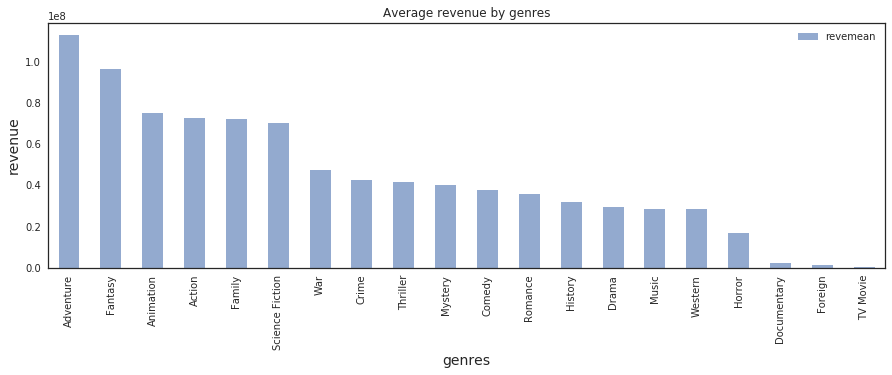

In [20]:
#对各类风格电影的平均票房收入进行可视化分析
revemean[:20].plot(kind='bar', title='Average revenue by genres', alpha=.6,figsize=(15, 4.5))
plt.xlabel('genres', fontsize=14)
plt.ylabel('revenue', fontsize=14);

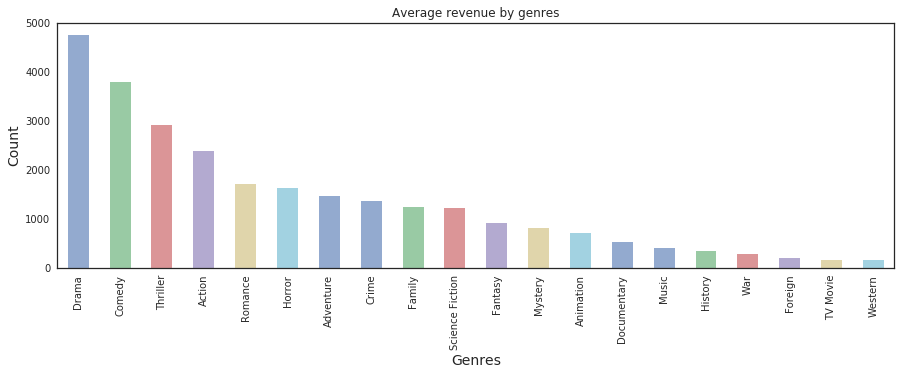

In [21]:
#计算所有电影风格的数量并可视化
g_count = df1_3.groupby('genres')['genres'].count().sort_values(ascending=False)
g_count[:20].plot(kind='bar', title='Average revenue by genres', alpha=.6,figsize=(15, 4.5))
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Count', fontsize=14);

通过对比可以看出，上映的电影风格数量与该风格的电影票房收入之间没有明显的重合度。

### 研究问题 2（比较电影上映时间是否与票房有影响？ ）

In [22]:
#求不同风格影片的最高收入所在上映月份
month_max = df1_3.groupby('genres')['month'].max()

In [23]:
#求不同风格影片的最低收入所在上映月份
month_min = df1_3.groupby('genres')['month'].min()

In [24]:
#按电影风格最值所在月份创建新表
month_max = pd.DataFrame({'month_max':month_max})
month_min = pd.DataFrame({'month_min':month_min})
rem = month_max.merge(month_min,left_index=True,right_index=True, how='left')
rem.reset_index(inplace=False)

,genres,month_max,month_min
0,Action,12,1
1,Adventure,12,1
2,Animation,12,1
3,Comedy,12,1
4,Crime,12,1
5,Documentary,12,1
6,Drama,12,1
7,Family,12,1
8,Fantasy,12,1
9,Foreign,12,1


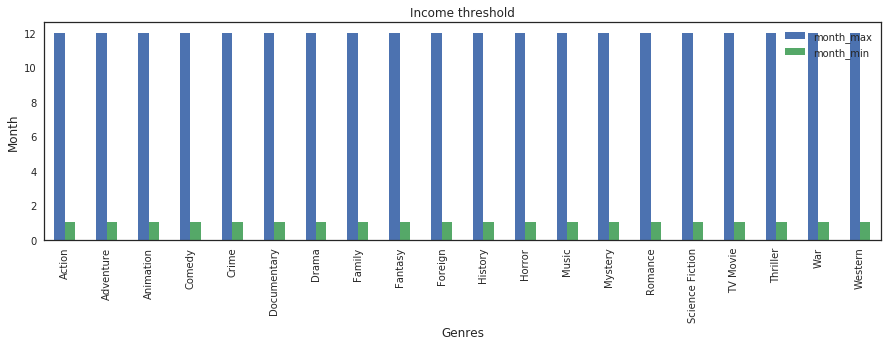

In [25]:
#对各类风格的电影收入所在月份进行可视化分析
rem.plot(kind='bar', title='Income threshold', alpha=1,figsize=(15, 4))
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Month', fontsize=12);

可以看出，12月是所有风格的影片票房最高的月份，而1月是所有风格影片票房最低的月份。

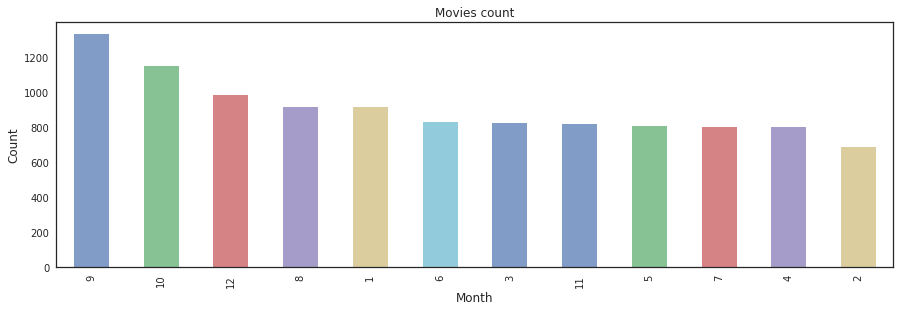

In [26]:
#对每月上映的电影数量可视化
df1_month = df1['month'].value_counts().sort_values(ascending=False)
df1_month.plot(kind='bar', title='Movies count', alpha=.7,figsize=(15, 4.5))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12);

对比月份与电影票房的数据，上映电影数量最多的月份并不是收入最高的月份。

### 研究问题3（口碑及评分越高的电影票房收益是否也越高？）

In [27]:
df2 = df1.copy()
df2.head()

,id,popularity,genres,release_date,vote_average,budget,revenue,release_year,month
0,135397,32.985763,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,150000000,1513528810,2015,6
1,76341,28.419936,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,150000000,378436354,2015,5
2,262500,13.112507,Adventure|Science Fiction|Thriller,2015-03-18,6.3,110000000,295238201,2015,3
3,140607,11.173104,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,200000000,2068178225,2015,12
4,168259,9.335014,Action|Crime|Thriller,2015-04-01,7.3,190000000,1506249360,2015,4


In [28]:
#删除所有制作成本（budget）为0的数据
df2.drop(df2[df2['budget']== 0].index, inplace = True)
df2.shape

(5168, 9)

In [29]:
#计算所有收益大于200%的电影数量
df2['revemax']=(df2['revenue']-df2['budget'])/df2['budget']
df2[(df2['revemax']>2)].id.count()

1404

In [30]:
#求电影收益最大的电影受欢迎程度
p_max = df2['revemax'].max()
df2_1 = df2[df2['revemax']==p_max].popularity
df2_1

10495    0.772494
Name: popularity, dtype: float64

In [31]:
#求受欢迎程度最高的电影票房收益
r_max = df2.popularity.max()
df2_2 = df2[df2['popularity']==r_max].revemax
df2_2

0    9.090192
Name: revemax, dtype: float64

In [32]:
#求评分最高的电影票房收益
v_max = df2.vote_average.max()
df2_3 = df2[df2['vote_average']==v_max].revemax
df2_3

4178    0.133659
5986   -1.000000
7948    3.149102
Name: revemax, dtype: float64

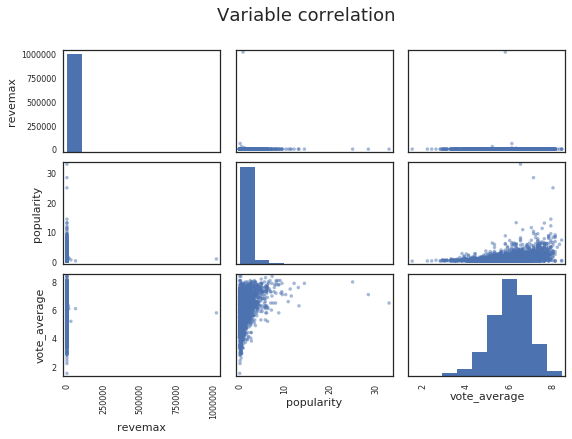

In [33]:
#对受欢迎程度，评分与电影票房收益进行可视化分析
pd.plotting.scatter_matrix(df2[["revemax", "popularity", "vote_average"]],figsize=(9, 6))
plt.subplots_adjust(wspace=.1,hspace=.1)
plt.suptitle('Variable correlation', fontsize=18);

通过各项数据比较，受欢迎程度和评分的关系重合度较高，而票房收益与口碑的重合度较低。

<a id='conclusions'></a>
## 结论

> **经过分析发现：**

> 1、不同的电影风格上映数量与其风格的电影票房收入之间没有明显的重合度，由于部分电影有多重风格，票房收入只能按均值进行比对，结论是否公正，仍需更严谨的分析；

> 2、在同一月上映的电影数量越多，并不代表该月的电影票房越高，根据统计结果，不论哪种风格的电影在12月份的票房收入显著高于其它月份，但是否达到显著性差异，仍需进行更严谨的分析；

> 3、票房收益最大的电影受欢迎程度分值为0.772494，受欢迎程度最高的电影票房收益为9.090192，获得评分最高的电影票房收益为-1.000000，受欢迎程度和评分的关系重合度较高，而票房收益与口碑的重合度较低，但差异是否达到显著性，仍需进行更严谨的分析。 

> **该结论的局限性：**

> 1、由于该数据集仅提供了一定时间内的口碑与评分数据，因而并不能够代表总体；

> 2、以上结论的得出依据的是描述性统计数据，仅代表此样本数据所做的分析。

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255